<a href="https://colab.research.google.com/github/HwangHanJae/open_cv_pratice/blob/main/opencv_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
path = "/content/test_image.webp"

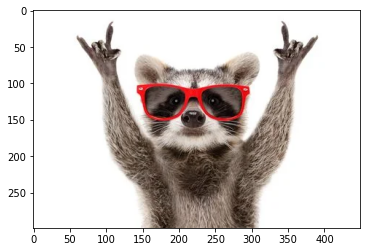

In [41]:
image = cv2.imread(path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


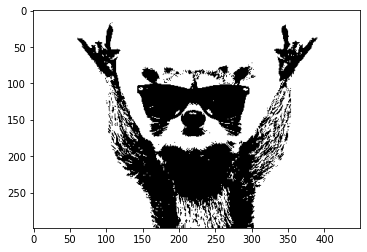

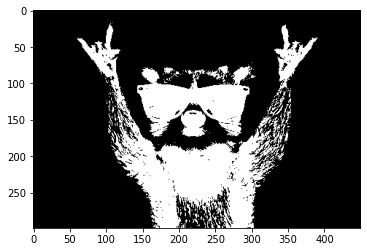

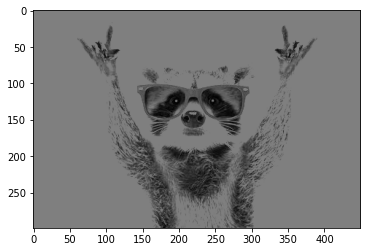

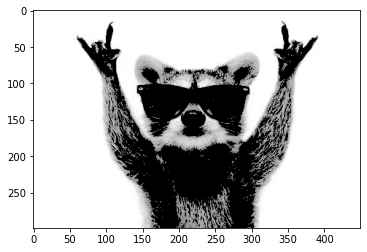

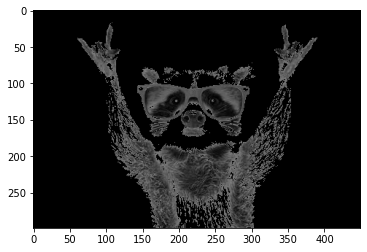

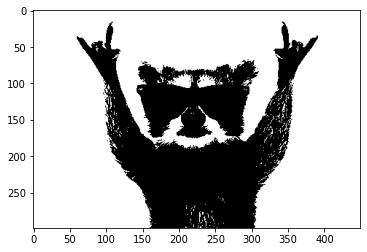

In [42]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

images = []
thresh_methods = [cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV, cv2.THRESH_OTSU]


for i in range(len(thresh_methods)):
  _, thresh = cv2.threshold(image_gray, 127, 255, thresh_methods[i])
  plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
  plt.show()

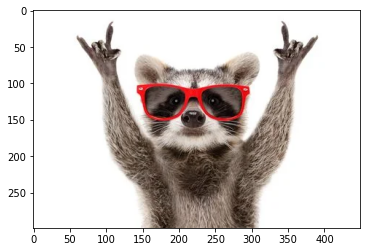

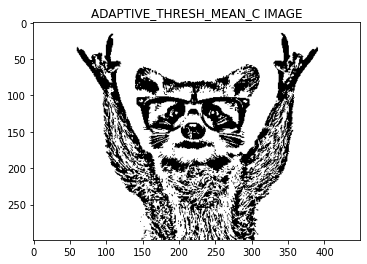

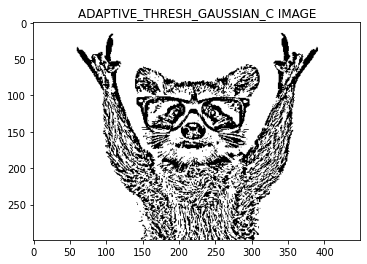

In [55]:
#적응 임계점 처리 방식
image = cv2.imread(path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


blk_size = 21
c = 5
#ADAPTIVE_THRESH_MEAN_C
thres1 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blk_size, c)
plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.title("ADAPTIVE_THRESH_MEAN_C IMAGE")
plt.show()

#ADAPTIVE_THRESH_GAUSSIAN_C
thres2 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blk_size, c)
plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.title("ADAPTIVE_THRESH_GAUSSIAN_C IMAGE")
plt.show()


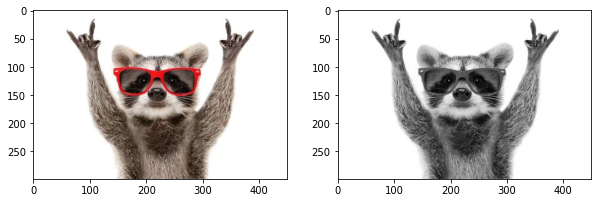

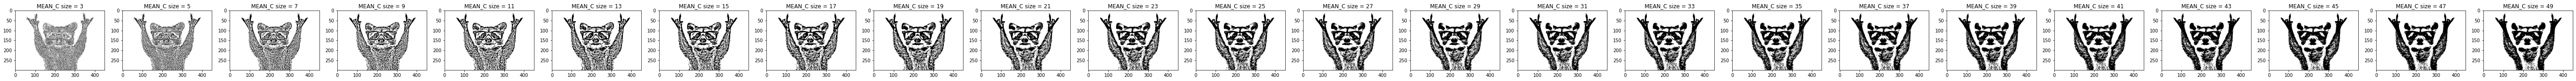

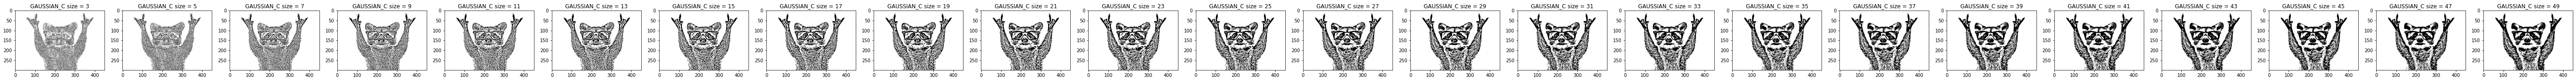

In [105]:
ㄴimage = cv2.imread(path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
start = 3
end = 50
figsize = (100, 50)
c = 3
blk_sizes = []
for i in range(start, end+1):
  if i % 2 != 0:
    blk_sizes.append(i)

f, ax = plt.subplots(1,2, figsize=(10, 10))
image = cv2.imread(path)
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB))
plt.show()


n = len(blk_sizes)
f , ax = plt.subplots(1, n, figsize=figsize)
#ADAPTIVE_THRESH_MEAN_C
for i in range(n):
  thres = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blk_sizes[i], c)
  ax[i].imshow(cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB))
  ax[i].set_title("MEAN_C size = {}".format(blk_sizes[i]))
plt.show()

n = len(blk_sizes)
f , ax = plt.subplots(1, n, figsize=figsize)
#ADAPTIVE_THRESH_GAUSSIAN_C
for i in range(n):
  thres = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blk_sizes[i], c)
  ax[i].imshow(cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB))
  ax[i].set_title("GAUSSIAN_C size = {}".format(blk_sizes[i]))
plt.show()

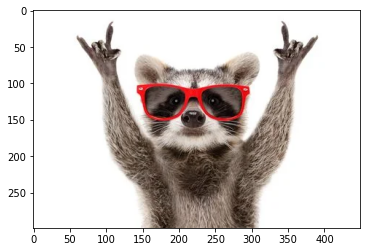

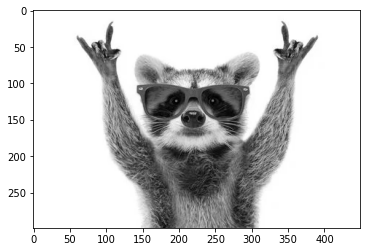

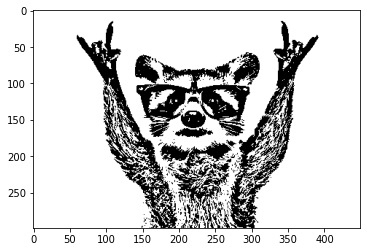

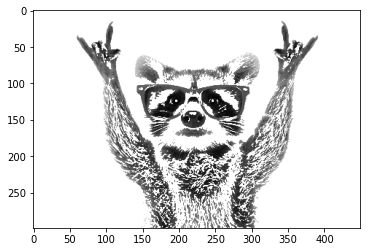

In [116]:
image = cv2.imread(path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

image = cv2.imread(path)
plt.imshow(cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB))
plt.show()


th = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 49, 3)

plt.imshow(cv2.cvtColor(th, cv2.COLOR_GRAY2RGB))
plt.show()

new = cv2.add(image_gray, th)
plt.imshow(cv2.cvtColor(new, cv2.COLOR_GRAY2RGB))
plt.show()

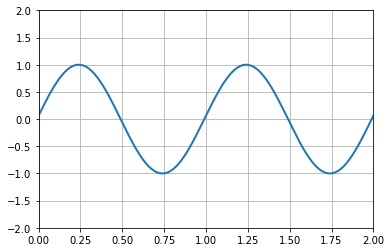

In [52]:
f, ax = plt.subplots()
ax.set_xlim((0,2))
ax.set_ylim((-2, 2))
ax.grid(True)

line,_ = ax.plot([],[], lw=2)
def init():
  
  line.set_data([],[])
  return (line,)
def animate(t):
  x = np.linspace(0, 2, 1000)
  y= np.sin(2*np.pi*(x-0.01*t))
  line.set_data(x, y)
  return (line, )

ani = animation.FuncAnimation(f, animate, init_func=init, frames=100, interval=30, blit=True)

HTML(ani.to_html5_video())